# Выявление закономерностей успешной игры 

Задачи проекта:

 - Выявить актуальный период и проводить анализ по нему;
 - Выбрать несколько потенциально прибыльных платформ;
 - Посмотреть, как на продажи влияют отзывы пользователей и критиков;
 - Посмотреть, какие жанры игр самые прибыльные; 
 - Составь портреты пользователя каждого региона:
 
  1) Рассмотреть для каждого региона самые популярные платформы;
  
  2) Рассмотреть для каждого региона самый популярный жанр;
  
  3) Рассмотреть влияет ли рейтинг ESRB на продажи региона. 
  
  
 - Проверить гипотезу: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые";
 - Проверить гипотезу: "Средние пользовательские рейтинги жанров Action и Sports разные."
 - Определить потенциально успешные характеристики игр на 2017-й год.

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
#импортируем необходимые библиотеки
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import factorial
from scipy import stats as st
import seaborn as sns
from functools import reduce
import warnings
warnings.filterwarnings("ignore")

In [2]:
#откроем таблицу и выведем её на экран
data = pd.read_csv('/datasets/games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
# посмотрим основные числовые характеристики для data
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [4]:
# посмотрим основную информацию по таблицу data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Вывод

Наша таблица имеет 16715 строк и 11 столбцов.

Рассмотрим столбцы:

 -  Name — название игры
 -	Platform — платформа
 -	Year_of_Release — год выпуска
 -	Genre — жанр игры
 -	NA_sales — продажи в Северной Америке (миллионы проданных копий)
 -	EU_sales — продажи в Европе (миллионы проданных копий)
 -	JP_sales — продажи в Японии (миллионы проданных копий)
 -	Other_sales — продажи в других странах (миллионы проданных копий)
 -	Critic_Score — оценка критиков (максимум 100)
 -	User_Score — оценка пользователей (максимум 10)
 -	Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Учтём, что данные за 2016 год могут быть неполными.

У нас столбец от оценки юзеров имеет тип данных object - это странно.
Также есть много нулевых значений в столбах по продажам в миллионах копий. 
Будем рассматривать данные несостыковки в следующей части проекта.

## Шаг 2. Подготовка данных

In [5]:
# проверим на наличие дубликатов нашу таблицу
print('В нашей таблице', data.duplicated().sum(), 'дубликатов')

В нашей таблице 0 дубликатов


In [6]:
# приведём названия столбцов к нижнему регистру
data.columns = map(str.lower, data.columns)

# Посмотрим пропущенные в стоблце с названием игры
print('В нашей таблице незаполнено название', data['name'].isnull().sum(), 'игр')

В нашей таблице незаполнено название 2 игр


In [7]:
# Посмотрим что это за строки в таблице
data.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [8]:
# удалим пропущенные значения из столбца с названием игр с помощью dropna ()
data.dropna(subset = ['name'], inplace = True)

В столбце platform пропущенных значений нет.

В столбце year_of_release есть около 300 пропущенных значений.
Изучим данные строки.

In [9]:
# Посмотрим что это за строки в таблице
data.query('year_of_release.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Значений меньше 2% от всей таблицы. Так что можем их удалить.

In [10]:
# удалим пропущенные значения из столбца года выпуска с помощью dropna ()
data.dropna(subset = ['year_of_release'], inplace = True)

# приведём столбец к числовому типу
data['year_of_release']=data['year_of_release'].astype('float64')

После удаления двух игр без названия, в столбце genre больше нет пропущенных.

Также нет пропущенных в стобцах: na_sales, eu_sales, jp_sales, other_sales.

В столбце critic_score около половины значений пропущенных, но их заменить тоже не получится математическим способом.
Это же касается и столбца user_score. Но столбец user_score имеет тип данных object, попробуем узнать из-за чего и исправить это.

In [11]:
# Посмотрим уникальные значения столбца с оценкой пользователей
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Есть некое значение 'tbd'. Из интернета выясняем, что это означает "To Be Determined, то есть "Будет определено".
Думаю в нашем контексте мы можем спокойно заменить его на Nan.

In [12]:
# заменим TBD на пропущенные значения
data = data.replace('tbd', np.nan)

# и приведём столбик с оценкой пользователей к числовому типу
data['user_score']=data['user_score'].astype('float64')

# проверим изменение типа данных
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null float64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             9768 non-null object
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


In [13]:
# и выведем основные числовые характеристики
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,7983.000000,7463.000000
mean,2006.486256,0.264012,0.145930,0.078487,0.047594,68.994363,7.126330
std,5.875525,0.818378,0.506716,0.311100,0.188005,13.920060,1.499447
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


В столбце rating около 7 тысяч пропусков, их заменить тоже никак не получится. Но посмотрим какие рейтинги есть у нас в данной таблице.

In [14]:
# Посмотрим уникальные значения столбца с рейтингом игр
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Найдём расшифровку рейтингов в интернете:

 - «E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет;
 - «M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет;
 - «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет;
 - «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»;
 - «K-A» - «Для детей и взрослых: игры, содержащие контент, подходящий для широкой аудитории. Этот рейтинг использовался до 1998 года, когда он был переименован в E»;
 - «AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет;
 - «EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими;
 - «RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга.

In [15]:
# Изменим рейтинг K-A на E
data['rating']=data['rating'].replace('K-A', 'E')

# Изменим рейтинг RP на Nan
data['rating']=data['rating'].replace('RP', np.nan)

Создадим столбец с продажами во всем регионах.

In [16]:
data['all_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

### Вывод

Я проверила таблицу на дубликаты и пропущенные значения.

Дубликатов не оказалось, удалила строки с пропущенными значениями в названии игр, их всего 2, так что это не повлияет на мои расчёты. 

Заменила значение tbd на пропущенное в столбце с рейтингом от игроков, т.к. расшифровка "To Be Determined, то есть "Будет определено", в нашем контексте вполне можно заменить на пропущенное, что по факту тоже не определено. Также из-за этого tbd столбец имел тип данных object, я заменила его на числовой.

Есть много пропущенных значений в столбцах с рейтингом от критиков, игроков и от организации ESRB. Их невозможно никак заменить. Пропуски в данных столбцах связаны с тем, что не все игры оценивают критики или игроки, или такие рейтинги не попали в глобальный интернет или в нашу таблицу. Отсутствие некоторых рейтингов по рейтингу от организации ESRB может быть связано с тем, что компания образована в 1994 году, до этого года они не могли присуждать играм рейтинг.

Также я создала столбец с итоговыми продажами.

## Шаг 3. Исследовательский анализ данных

### Посмотрим сколько игр выпускалось в разные годы

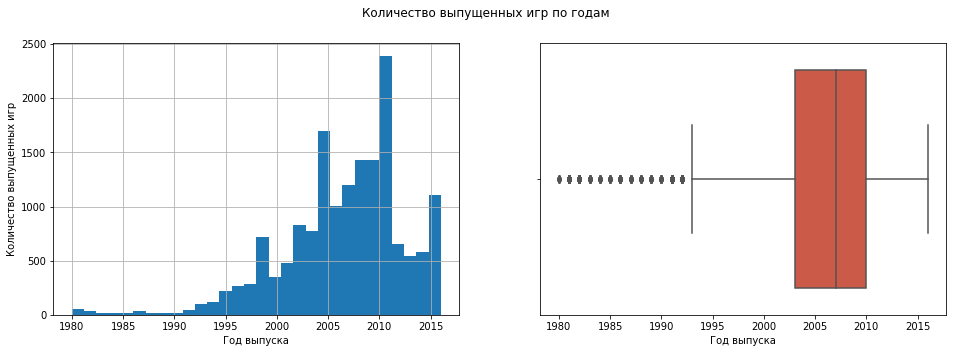

In [17]:
# Создадим одну строку с двумя колонками
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Построим гистрограмму для столбца с годом выпуска
plt.style.use  ('ggplot')
data['year_of_release'].hist(bins = 30, ax=axes[0])

# Создадим график boxplot для выпущенных игр по году выпуска
sns.boxplot(data=data.sort_values(by='year_of_release'), x='year_of_release', ax=axes[1])

# Добавим подписи для каждой колонки 
axes[0].set_xlabel('Год выпуска')
axes[0].set_ylabel('Количество выпущенных игр')
axes[1].set_xlabel('Год выпуска')

# Добавим общий заголовок
fig.suptitle('Количество выпущенных игр по годам');

In [18]:
# Уберём из таблицы все строки с годом выпусска игры ранее 2012 года
data = data[data['year_of_release'] >= 2012]

#### Вывод

Как видим по нашим графикам, больше всего игр было выпущено в 2011 году, и также что игры датой выпуска ранее 1993 попадают в выбросы. Но 22 года слишком большой срок для таких задач. Возьмём период в 3 года.

### Рассмотрим, как менялись продажи по платформам.

In [19]:
# Создадим новую таблицу, в которой будет название платформа 
# и сумма продаж на данной платформе
sales_by_platform = data.pivot_table(
    index = 'platform', values = 'all_sales', aggfunc = sum)

# Выведем последнюю таблицу и отсортируем по возрастанию
sales_by_platform.sort_values(by = 'all_sales', ascending = False)

,all_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


Рассмотрим более подробно по продаже по графикам по годам.

PS4


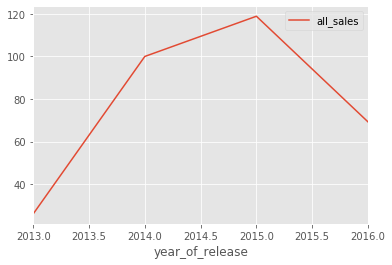

PS3


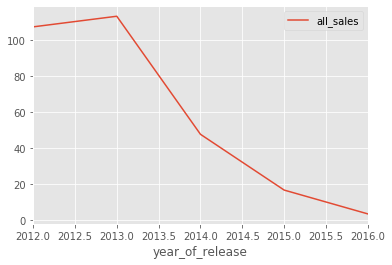

X360


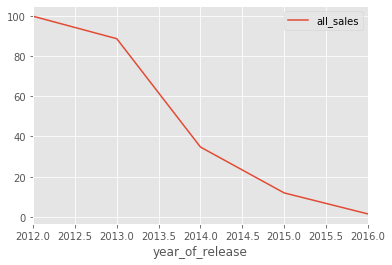

3DS


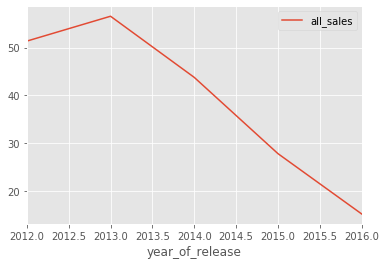

XOne


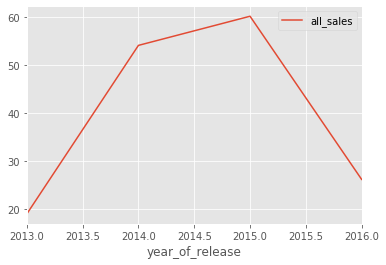

WiiU


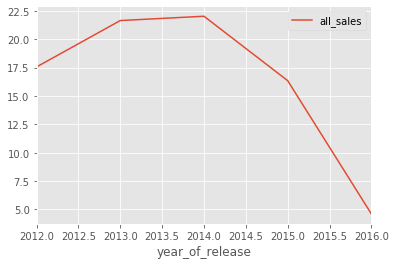

PC


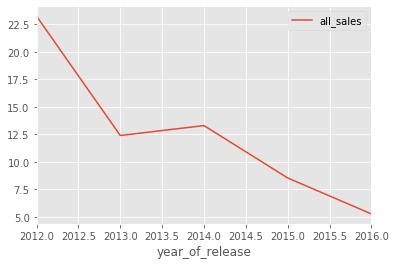

PSV


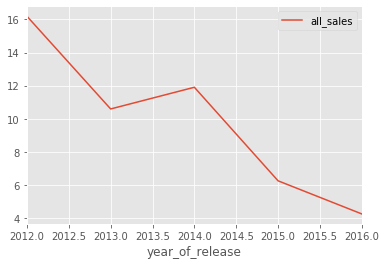

Wii


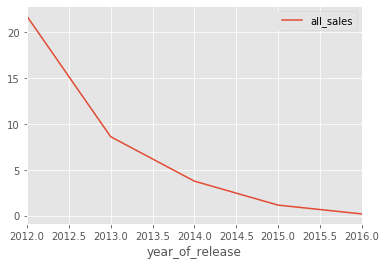

DS


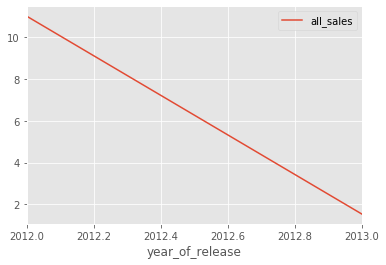

PSP


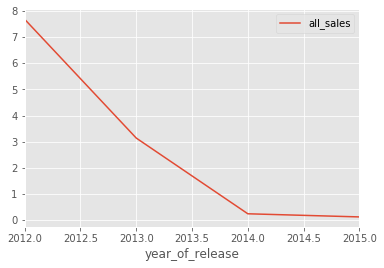

In [20]:
# Создадим сводную таблицу по платформам
platform_sales = (
    data
    .pivot_table(index='platform', values='all_sales', aggfunc='sum')
    .sort_values('all_sales', ascending=False)
)

# Сделаем функцию по созданной таблице
for platform in platform_sales.index:
    print(platform)
    (data
     .query('platform == @platform')
     .pivot_table(index='year_of_release', values='all_sales', aggfunc='sum')
     .plot()
    )
    plt.show()    

PS4 перспективная платформа, хоть и находится в упадке, но на 2016 год имеет около 70 миллионов продаж.

Платформа PS3, уже почти не имеет продаж на 2016 года, пик пришёлся на 2013 год.

X360 на 2016 год не имеет продаж.

3DS имел пик в 2013 году, на 2016 год почти не имеет продаж.

Xone имел пик продаж на 2015 год, на 2016 имеет около 25 миллионов копий продаж.

WiiU имел пик в 2013 и 2014 годах, на 2016 год имеет около 5 миллионов копий продаж.

PC имеет пик на 2011 год, но всё ещё имеет около 5 миллионовкопий продаж на 2016 год.

PSV имел пика на 2012 год, на 2016 год имеет около 4 миллионов копий продаж.

Wii имел пик продаж в 2012 году, продаж на 2016 почти не имеет.

DS после 2013 не имеет продаж.

PSP не имеет продаж с 2014 года

В среднем платформы "живут" 5-10 лет, исключение составляет только PC, то есть персональный компьютер.

Из списка выше выведем потенциально прибыльные платформы, у которых есть продажи на 2016 год.

In [21]:
# Создадим переменную с перечислением наших 5 платформ
top_5_platform = [
    'PS4', 'PC', 'XOne', 'WiiU', 'PSV']

# Создадим новую таблицу, в которой будет информация по играм из 5 платформ
data_top_5_platform = data.query('platform == @top_5_platform')

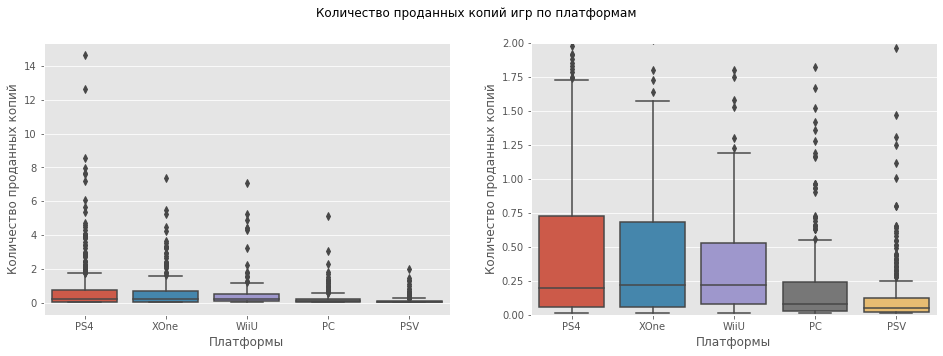

In [22]:
# Создадим одну строку с двумя колонками
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.
plt.style.use  ('ggplot')
sns.boxplot(data = data_top_5_platform, y = 'all_sales', x='platform', ax=axes[0])

# Построит тот же график, но немного увеличим
sns.boxplot(data = data_top_5_platform, y = 'all_sales', x='platform', ax=axes[1])
plt.ylim(0,2)

# Добавим подписи для каждой колонки 
axes[0].set_xlabel('Платформы')
axes[0].set_ylabel('Количество проданных копий')
axes[1].set_xlabel('Платформы')
axes[1].set_ylabel('Количество проданных копий')

# Добавим общий заголовок
fig.suptitle('Количество проданных копий игр по платформам');

#### Вывод

Я вывела графики для каждой платформы, чтобы посмотреть подробнее про их продажи.

Не смотря на то что у многих платформ продажи выше, чем у тех, какие я взяла для рассчётов, но на данный момент для таких платформ игры уже не выпускаются или имеют продажи приближенные к нулю.

Потому я взяла следующие 5 платформ, у которых есть продажи на 2016 год: PS4, PC, XOne, WiiU, PSV.

Лидером по продажам является платформа PS4, следующие платформа XOne, WiiU, PC и PSV соответственно. Основные продажи игр попадают в 1-2 миллиона копий, медиана попадает примерно в 250 тысяч копий, 75% квантиль в 700 тысяч копий, всё остальное попадает в выбросы.

### Посмотрим как на продажи влияют отзывы пользователей и критиков на примере платформы PS4.

,critic_score,user_score,all_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
all_sales,0.406568,-0.031957,1.000000


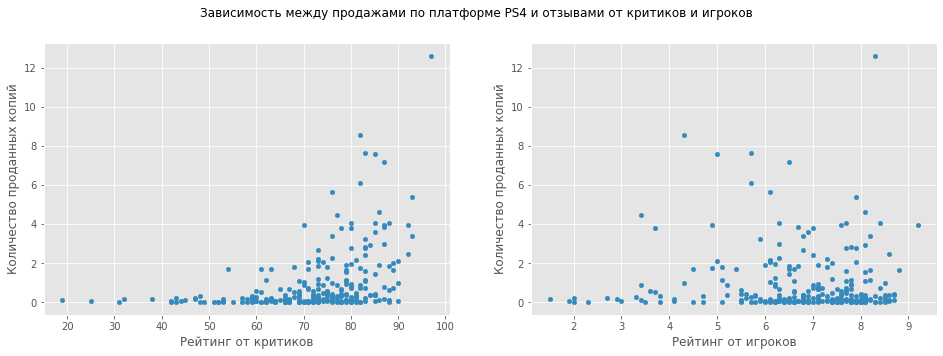

In [23]:
# Создадим таблицу только с платформой PS4
PS4_platform = ['PS4']
data_PS4 = data_top_5_platform.query('platform == @PS4_platform')

# И оставим в таблице только столбцы с итоговыми продажами и отзывы от игроков и критиков
data_PS4 = data_PS4[['platform', 'critic_score', 'user_score', 'all_sales']]

# Создадим одну строку с двумя колонками
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Построим диаграмму рассеяния в соотношении отзывов критиков и копий продаж
plt.style.use  ('ggplot')
data_PS4.plot(x="critic_score", y="all_sales", kind="scatter", ax=axes[0])

# Создадим гиаграмму рассеяния в соотношении отзывов игроков и копий продаж
data_PS4.plot(x="user_score", y="all_sales", kind="scatter", ax=axes[1])

# Добавим подписи для каждой колонки 
axes[0].set_xlabel('Рейтинг от критиков')
axes[0].set_ylabel('Количество проданных копий')
axes[1].set_xlabel('Рейтинг от игроков')
axes[1].set_ylabel('Количество проданных копий')

# Добавим общий заголовок
fig.suptitle('Зависимость между продажами по платформе PS4 и отзывами от критиков и игроков');

# И выведем числовую зависимость с помощью метода corr ()
data_PS4.corr()

,critic_score,user_score,all_sales
critic_score,1.000000,0.432587,0.237243
user_score,0.432587,1.000000,-0.121867
all_sales,0.237243,-0.121867,1.000000


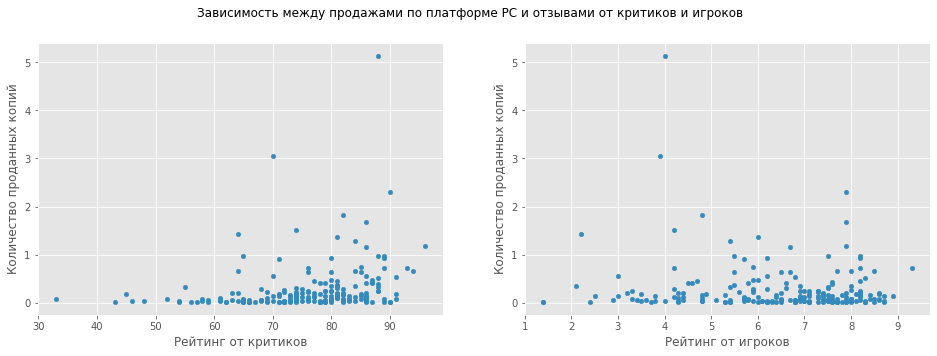

In [24]:
# Создадим таблицу только с платформой PC
PC_platform = ['PC']
data_PC = data_top_5_platform.query('platform == @PC_platform')

# И оставим в таблице только столбцы с итоговыми продажами и отзывы от игроков и критиков
data_PC = data_PC[['platform', 'critic_score', 'user_score', 'all_sales']]

# Создадим одну строку с двумя колонками
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Построим диаграмму рассеяния в соотношении отзывов критиков и копий продаж
plt.style.use  ('ggplot')
data_PC.plot(x="critic_score", y="all_sales", kind="scatter", ax=axes[0])

# Создадим гиаграмму рассеяния в соотношении отзывов игроков и копий продаж
data_PC.plot(x="user_score", y="all_sales", kind="scatter", ax=axes[1])

# Добавим подписи для каждой колонки 
axes[0].set_xlabel('Рейтинг от критиков')
axes[0].set_ylabel('Количество проданных копий')
axes[1].set_xlabel('Рейтинг от игроков')
axes[1].set_ylabel('Количество проданных копий')

# Добавим общий заголовок
fig.suptitle('Зависимость между продажами по платформе PC и отзывами от критиков и игроков');

# И выведем числовую зависимость с помощью метода corr ()
data_PC.corr()

,critic_score,user_score,all_sales
critic_score,1.000000,0.472462,0.416998
user_score,0.472462,1.000000,-0.068925
all_sales,0.416998,-0.068925,1.000000


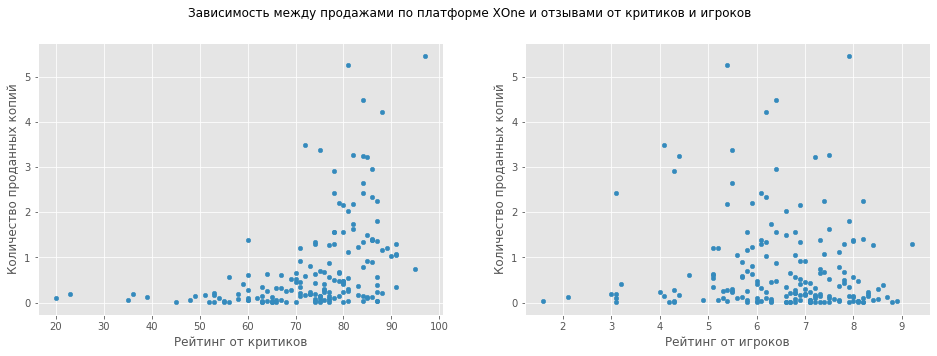

In [25]:
# Создадим таблицу только с платформой XOne
XOne_platform = ['XOne']
data_XOne = data_top_5_platform.query('platform == @XOne_platform')

# И оставим в таблице только столбцы с итоговыми продажами и отзывы от игроков и критиков
data_XOne = data_XOne[['platform', 'critic_score', 'user_score', 'all_sales']]

# Создадим одну строку с двумя колонками
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Построим диаграмму рассеяния в соотношении отзывов критиков и копий продаж
plt.style.use  ('ggplot')
data_XOne.plot(x="critic_score", y="all_sales", kind="scatter", ax=axes[0])

# Создадим гиаграмму рассеяния в соотношении отзывов игроков и копий продаж
data_XOne.plot(x="user_score", y="all_sales", kind="scatter", ax=axes[1])

# Добавим подписи для каждой колонки 
axes[0].set_xlabel('Рейтинг от критиков')
axes[0].set_ylabel('Количество проданных копий')
axes[1].set_xlabel('Рейтинг от игроков')
axes[1].set_ylabel('Количество проданных копий')

# Добавим общий заголовок
fig.suptitle('Зависимость между продажами по платформе XOne и отзывами от критиков и игроков');

# И выведем числовую зависимость с помощью метода corr ()
data_XOne.corr()

,critic_score,user_score,all_sales
critic_score,1.00000,0.770080,0.348380
user_score,0.77008,1.000000,0.400219
all_sales,0.34838,0.400219,1.000000


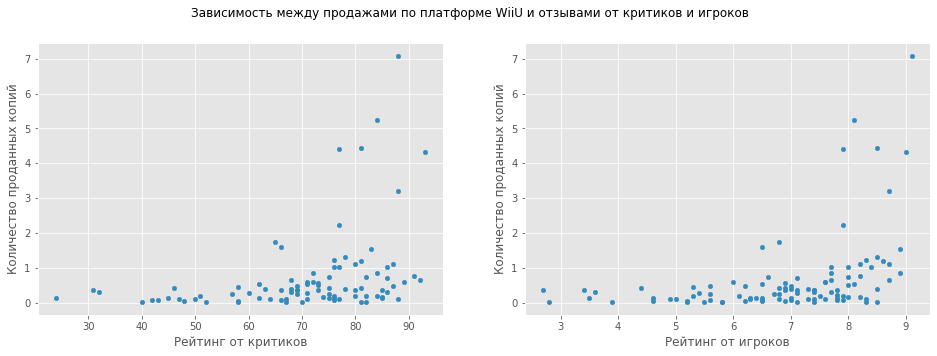

In [26]:
# Создадим таблицу только с платформой WiiU
WiiU_platform = ['WiiU']
data_WiiU = data_top_5_platform.query('platform == @WiiU_platform')

# И оставим в таблице только столбцы с итоговыми продажами и отзывы от игроков и критиков
data_WiiU = data_WiiU[['platform', 'critic_score', 'user_score', 'all_sales']]

# Создадим одну строку с двумя колонками
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Построим диаграмму рассеяния в соотношении отзывов критиков и копий продаж
plt.style.use  ('ggplot')
data_WiiU.plot(x="critic_score", y="all_sales", kind="scatter", ax=axes[0])

# Создадим гиаграмму рассеяния в соотношении отзывов игроков и копий продаж
data_WiiU.plot(x="user_score", y="all_sales", kind="scatter", ax=axes[1])

# Добавим подписи для каждой колонки 
axes[0].set_xlabel('Рейтинг от критиков')
axes[0].set_ylabel('Количество проданных копий')
axes[1].set_xlabel('Рейтинг от игроков')
axes[1].set_ylabel('Количество проданных копий')

# Добавим общий заголовок
fig.suptitle('Зависимость между продажами по платформе WiiU и отзывами от критиков и игроков');

# И выведем числовую зависимость с помощью метода corr ()
data_WiiU.corr()

,critic_score,user_score,all_sales
critic_score,1.000000,0.699199,0.094488
user_score,0.699199,1.000000,-0.004339
all_sales,0.094488,-0.004339,1.000000


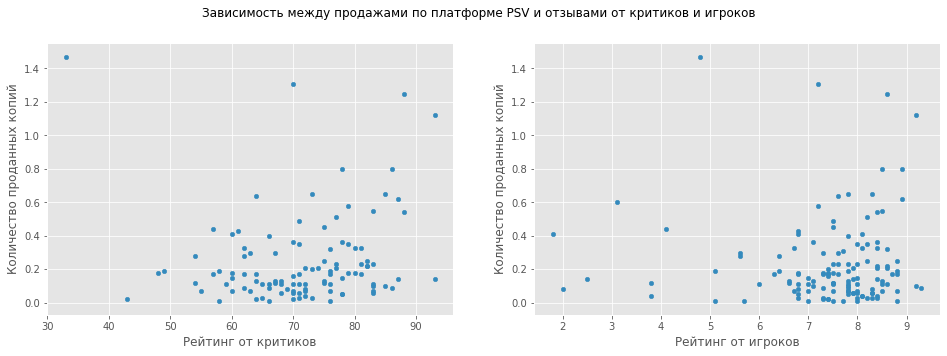

In [27]:
# Создадим таблицу только с платформой PSV
PSV_platform = ['PSV']
data_PSV = data_top_5_platform.query('platform == @PSV_platform')

# И оставим в таблице только столбцы с итоговыми продажами и отзывы от игроков и критиков
data_PSV = data_PSV[['platform', 'critic_score', 'user_score', 'all_sales']]

# Создадим одну строку с двумя колонками
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Построим диаграмму рассеяния в соотношении отзывов критиков и копий продаж
plt.style.use  ('ggplot')
data_PSV.plot(x="critic_score", y="all_sales", kind="scatter", ax=axes[0])

# Создадим гиаграмму рассеяния в соотношении отзывов игроков и копий продаж
data_PSV.plot(x="user_score", y="all_sales", kind="scatter", ax=axes[1])

# Добавим подписи для каждой колонки 
axes[0].set_xlabel('Рейтинг от критиков')
axes[0].set_ylabel('Количество проданных копий')
axes[1].set_xlabel('Рейтинг от игроков')
axes[1].set_ylabel('Количество проданных копий')

# Добавим общий заголовок
fig.suptitle('Зависимость между продажами по платформе PSV и отзывами от критиков и игроков');

# И выведем числовую зависимость с помощью метода corr ()
data_PSV.corr()

#### Вывод

Судя по левой диаграмме рассеяния, есть зависимость между продажами и отзывами от критиков, чем выше отзывы у критиков, тем больше продаж, особенно псоле оценки в 70 баллов из 100.

По правой же диаграмме нет, такой прямой зависимости, от отзывов игроков и количествам продаж. Но при оценки после 6 баллов из 9, идут более активные продажи, но нет больших продаж в количествам миллиона копий.

По числовой корреляции тоже видно, что продажи больше зависят от оценки критиков, но не 100%.

Наверное, игроки больше доверяют критикам, чем другим игрокам.

### Посмотрим какой жанр игры самый прибыльный.

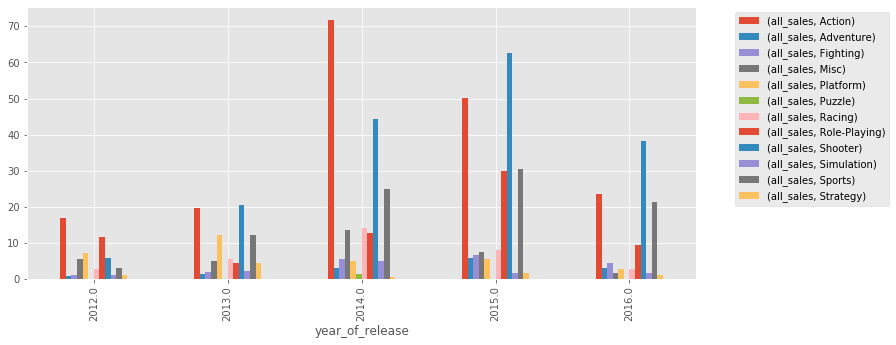

In [28]:
# Построим график где будет указано количество выпущенных игр того или иного жанра по годам
data_top_5_platform[['all_sales', 'year_of_release', 'genre']]\
.groupby(['year_of_release', 'genre']).sum().unstack('genre').plot(kind='bar', figsize=(12,5));
plt.legend(bbox_to_anchor=(1.05, 1));

Лидирующий жанр следует выбрать по средним продажам

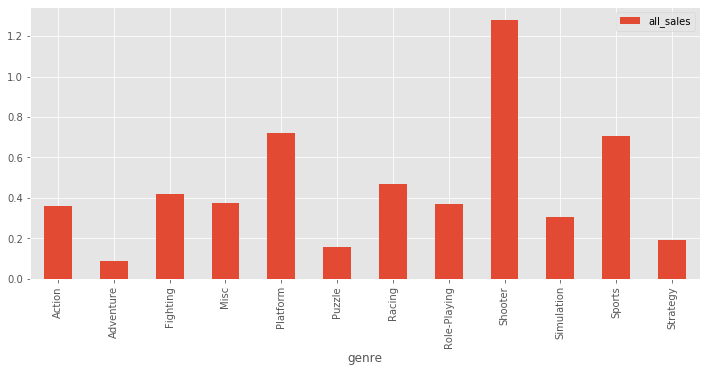

In [29]:
# Создадим сводную таблицу, где будут указаны жанры и их средние общие продажи
sales_genres  = data_top_5_platform.groupby(['genre'])\
                        .agg({'all_sales':'mean'})\

# Построим на основании сводной таблицы график
sales_genres.plot(kind='bar', figsize=(12,5));

#### Вывод

За поcледние 5 лет больше всего игр выходят в жанрах это Action, Shooter и Sports.

Меньше всего жанров Strategy, Puzzle и Adventure.

Но при этом самые прибыльные жанры это Shooter, Platform и Sports.

Меньше всего прибыли приносят игры жанров Adventure, Puzzle и Strategy.

### Вывод

В итоге за основную таблицу, на основе которой у меня будут проводится дальнейшие расчёты, я взяла следующие параметры:
 - Год выпуска игр после 1993 года;
 - Платформы имеющие на 2016 год продажи: PS4, PC, XOne, WiiU, PSV;

Также выявила следующие закономерности:
 - После отзывов критиков с оценкой не менее 70 из 100 идут более высокие продажи;
 - Отзывы игроков не сильно влияют на уровень продаж;
 - Самые прибыльные жанры: Shooter, Platform и Sports;
 - Жанры с самыми низкими продажами: Strategy, Puzzle и Adventure.

## Шаг 4. Составление портрета пользователя каждого региона

### Рассмотрим самые популярные платформы.

Определите для пользователя каждого региона (NA, EU, JP):
 - Самые популярные платформы (топ-5). Опишите различия в долях продаж.

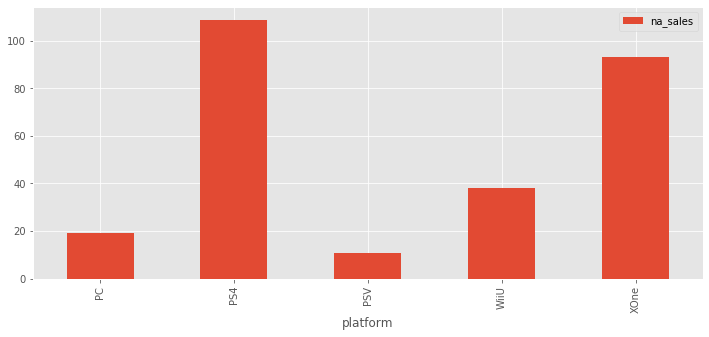

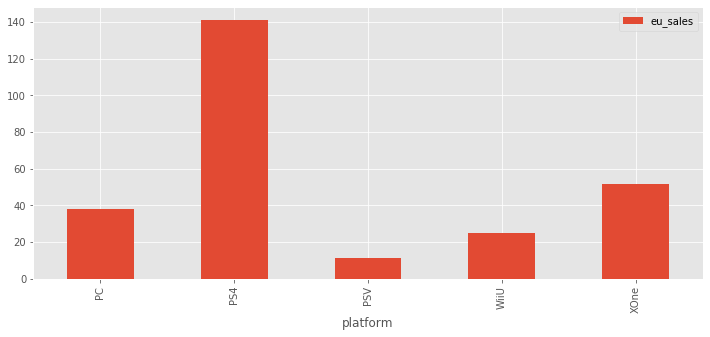

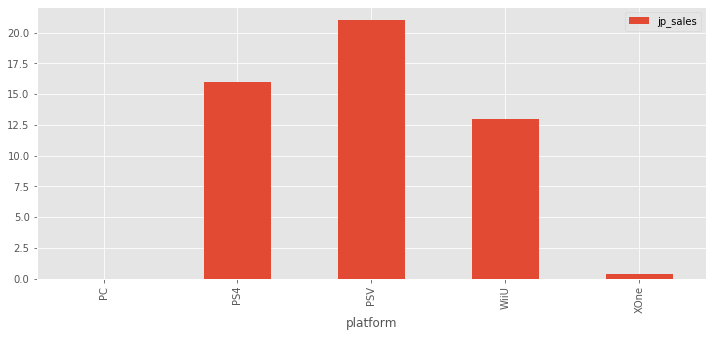

In [30]:
# Создадим график где будет видна зависимость платформы и продаж в Северной Америке
data_top_5_platform.pivot_table(index='platform', values='na_sales', aggfunc='sum').plot(kind='bar', figsize=(12,5))
plt.show()  

# Создадим график где будет видна зависимость платформы и продаж в Европе
data_top_5_platform.pivot_table(index='platform', values='eu_sales', aggfunc='sum').plot(kind='bar', figsize=(12,5))
plt.show()

# Создадим график где будет видна зависимость платформы и продаж в Японии
data_top_5_platform.pivot_table(index='platform', values='jp_sales', aggfunc='sum').plot(kind='bar', figsize=(12,5));

#### Вывод

Самые любимые платформы в Северной Америке это: PS4, XOne и WiiU соответственно.

У Европы - PS4, XOne и PC.

В Японии - PSV, PS4 и WiiU.

### Рассмотрим самые популярные жанры.

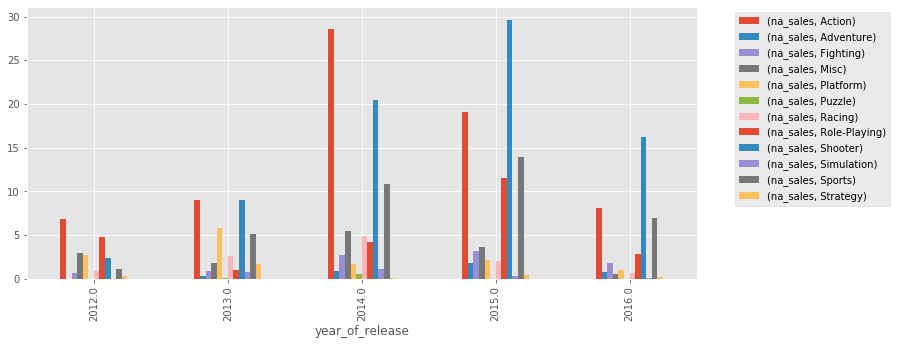

In [31]:
# Построим график где будет указано количество проданных игр того или иного жанра по годам для Северной Америки
data_top_5_platform[['na_sales', 'year_of_release', 'genre']]\
.groupby(['year_of_release', 'genre']).sum().unstack('genre').plot(kind='bar', figsize=(12,5))
plt.legend(bbox_to_anchor=(1.05, 1));

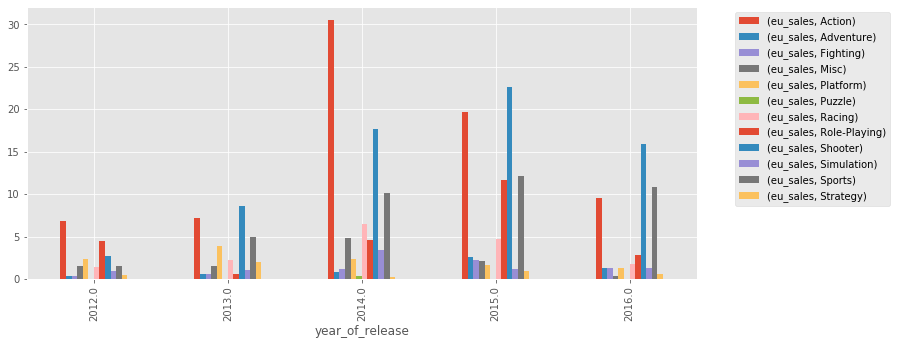

In [32]:
# Построим график где будет указано количество проданных игр того или иного жанра по годам для Европы
data_top_5_platform[['eu_sales', 'year_of_release', 'genre']]\
.groupby(['year_of_release', 'genre']).sum().unstack('genre').plot(kind='bar', figsize=(12,5))
plt.legend(bbox_to_anchor=(1.05, 1));

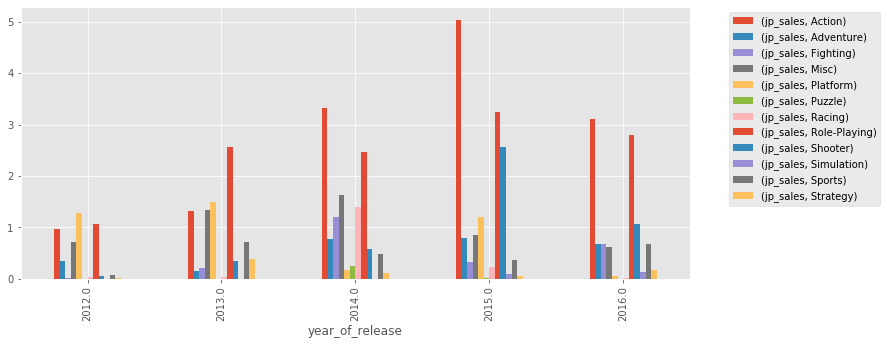

In [33]:
# Построим график где будет указано количество проданных игр того или иного жанра по годам для Японии
data_top_5_platform[['jp_sales', 'year_of_release', 'genre']]\
.groupby(['year_of_release', 'genre']).sum().unstack('genre').plot(kind='bar', figsize=(12,5))
plt.legend(bbox_to_anchor=(1.05, 1));

#### Вывод

В каждом регионе свой топ 3 любимых жанров:
 - для Северной Америки это: Action, Shooter и Sports
 - для Европы - Action, Shooter и Sports
 - а для Японии это: Action, Role - Playing и Shooter
 
Возможно жанр ролевых игр пользуется успехов в Японии, потому что есть особый вид ролевых игр - JRPG — (англ. Japanese Role-Playing Game) — японская ролевая игра. Если быть точным, это особый поджанр RPG со своими особенностями, отличные от западных представителей жанра.

### Посмотрим как влияет рейтинг ESRB на продажи

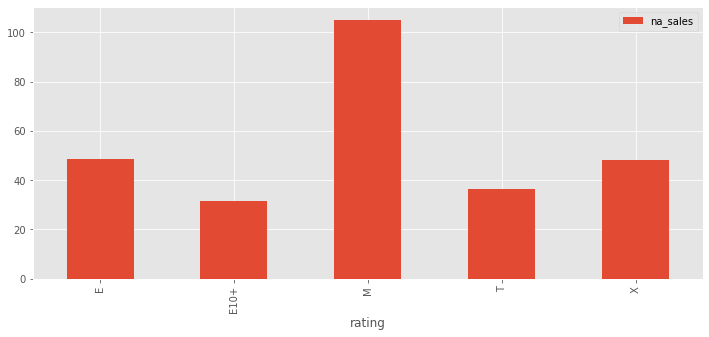

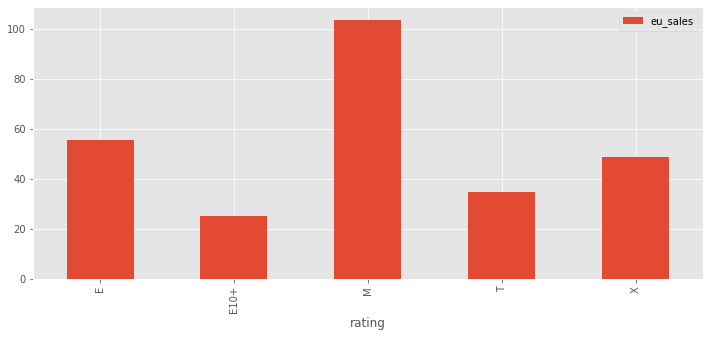

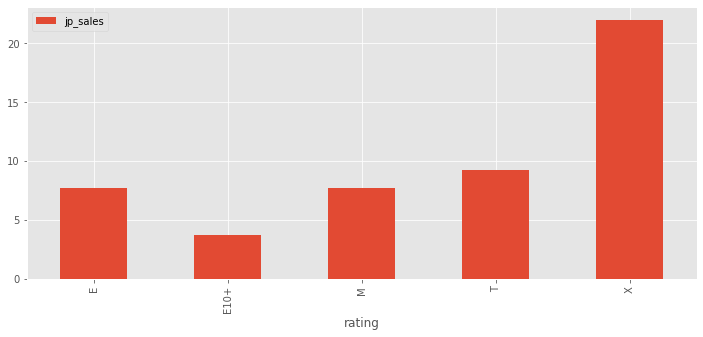

In [34]:
# Заменим пропущенные значения в столбце rating, например, на X, чтобы увидеть, как популярны игры без рейтинга
data_top_5_platform['rating'] = data_top_5_platform['rating'].fillna('X')

# Создадим график где будет видна зависимость рейтинга ESRB и продаж в Северной Америке
data_top_5_platform.pivot_table(index='rating', values='na_sales', aggfunc='sum').plot(kind='bar', figsize=(12,5))
plt.show()  

# Создадим график где будет видна зависимость рейтинга ESRB и продаж в Европе
data_top_5_platform.pivot_table(index='rating', values='eu_sales', aggfunc='sum').plot(kind='bar', figsize=(12,5))
plt.show()

# Создадим график где будет видна зависимость рейтинга ESRB и продаж в Японии
data_top_5_platform.pivot_table(index='rating', values='jp_sales', aggfunc='sum').plot(kind='bar', figsize=(12,5));

#### Вывод

Самый непопурный рейтинг во всех регионах это E10+ - «Для всех от 10 лет и старше».

Самыйе популярные игры для Северной Америки и Европы имеют рейтинг M - «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.

Самые популярные игры для Японии имеют рейтинг T - «Подросткам»: Игра подходит для лиц от 13 лет.

### Вывод

Для игроков из Северной Америки характерны следующие черты:
 - Любимые платформы это: PS4, XOne и WiiU;
 - Любимые жанры: Action, Shooter и Sports;
 - Самые популярные игры имеют рейтинг M - для взрослых;
 - Самые непопурные игры имеют рейтинг E10+ - «Для всех от 10 лет и старше».
 
Для игроков из Европы характерны следующие черты:
 - Любимые платформы это: PS4, XOne и PC;
 - Любимые жанры: Action, Shooter и Sports;
 - Самые популярные игры имеют рейтинг M - для взрослых;
 - Самые непопурные игры имеют рейтинг E10+ - «Для всех от 10 лет и старше».
 
Для игроков из Японии характерны следующие черты:
 - Любимые платформы это: PSV, PS4 и WiiU;
 - Любимые жанры: Action, Role - Playing и Shooter;
 - Самые популярные игры имеют рейтинг T - Подросткам;
 - Самые непопурные игры имеют рейтинг E10+ - «Для всех от 10 лет и старше».

## Шаг 5. Проверка гипотез

### Гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза звучит так: Средние пользовательские рейтинги платформ Xbox One и PC совпадают.

Альтернативная: что они отличаются.

In [35]:
# Создадим таблицу только для платформы Xone
data_XOne  = data_top_5_platform[data_top_5_platform['platform'] == 'XOne']
# Удалим все пропущенные значения в столбце user_score
data_XOne.dropna(subset = ['user_score'], inplace = True)

# Создадим таблицу только для платформы PC
data_PC  = data_top_5_platform[data_top_5_platform['platform'] == 'PC']
# Удалим все пропущенные значения в столбце user_score
data_PC.dropna(subset = ['user_score'], inplace = True)

import warnings
warnings.filterwarnings("ignore")

In [36]:
# Посмотрим на дисперсии наших выборок

# рассчитаем дисперсию для платформы Xone
# Так как выборка в нашей изначальной таблице может быть неполной, то ddorf = 1
dispersion_XOne = np.var(data_XOne['user_score'], ddof = 1)

# рассчитаем дисперсию для платформы PC
dispersion_PC = np.var(data_PC['user_score'], ddof = 1)

# И выведем их на экран
print('Дисперсия по платформе XOne:', dispersion_XOne)
print('Дисперсия по платформе PC:', dispersion_PC)

Дисперсия по платформе XOne: 1.9069968429360695
Дисперсия по платформе PC: 2.770443997158418


Значит нам нужно использовать equal_var = False

In [37]:
# Выведем на экран средние пользовательские рейтинги для платформ XOne и PC.
print('cредний пользовательский рейтинг платформы XOne: ', data_XOne['user_score'].mean())
print('cредний пользовательский рейтинг платформы PC: ', data_PC['user_score'].mean())

alpha = 0.05
results = st.ttest_ind(data_XOne['user_score'], data_PC['user_score'], equal_var = False) 
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

cредний пользовательский рейтинг платформы XOne:  6.521428571428572
cредний пользовательский рейтинг платформы PC:  6.4286407766990274
p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


#### Вывод

Раз нулевая гипотеза с формулировкой, что средние пользовательские рейтинги платформ Xbox One и PC совпадают. Выходит, что средние пользовательские рейтинги отличаются. В сторону игроков платформы PC. У них в среднем рейтинг выше на 0,5 балла из 10, чем у игроков платформы XOne.

Так что мы отвергаем гипотезу по нашей выборке.

### Гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные.

Нулевая гипотеза звучит так: средние пользовательские рейтинги жанров Action и Sports совпадают.

Альтернативная: что они отличаются.

In [38]:
# Создадим таблицу только для жанра Action
data_Action  = data_top_5_platform[data_top_5_platform['genre'] == 'Action']
# Удалим все пропущенные значения в столбце user_score
data_Action.dropna(subset = ['user_score'], inplace = True)

# Создадим таблицу только для жанра Sports
data_Sports  = data_top_5_platform[data_top_5_platform['genre'] == 'Sports']
# Удалим все пропущенные значения в столбце user_score
data_Sports.dropna(subset = ['user_score'], inplace = True)

In [39]:
# Посмотрим на дисперсии наших выборок

# рассчитаем дисперсию для жанра Action
# Так как выборка в нашей изначальной таблице может быть неполной, то ddorf = 1
dispersion_Action = np.var(data_Action['user_score'], ddof = 1)

# рассчитаем дисперсию для жанра Sports
dispersion_Sports = np.var(data_Sports['user_score'], ddof = 1)

# И выведем их на экран
print('Дисперсия по жанру Action:', dispersion_Action)
print('Дисперсия по жанру Sports:', dispersion_Sports)

Дисперсия по жанру Action: 1.6964019433582178
Дисперсия по жанру Sports: 2.57964953271028


Значит нам нужно использовать equal_var = False

In [40]:
# Выведем на экран средние пользовательские рейтинги для платформ XOne и PC.
print('cредний пользовательский рейтинг жанра Action: ', data_Action['user_score'].mean())
print('cредний пользовательский рейтинг жанра Sports: ', data_Sports['user_score'].mean())

alpha = 0.05
results = st.ttest_ind(data_Action['user_score'], data_Sports['user_score'], equal_var = False) 
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

cредний пользовательский рейтинг жанра Action:  6.903436426116839
cредний пользовательский рейтинг жанра Sports:  5.658333333333332
p-значение: 1.879412529507438e-11
Отвергаем нулевую гипотезу


#### Вывод

Раз нулевая гипотеза с формулировкой, что средние пользовательские рейтинги жанров Action и Sports совпадают, отвергается. Выходит, что средние пользовательские рейтинги отличаются. В сторону игроков жанра Action. У них в среднем рейтинг выше на 1,2 балла из 10, чем у игроков платформы Sports.

Так что по нашей выборке мы не можем опровергнуть гипотезу, что средние пользовательские рейтинги жанров Action и Sports разные.

### Вывод

По данной нам выборке мы не смогли опровергнуть гипотезу:

    Средние пользовательские рейтинги жанров Action и Sports разные.

Но опровергли гипотезу:

    Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

## Общий вывод

В данной работе мы рассмотрели данные до 2016 года.
Заменили некоторые значения:
 - Оценку tbd на пропущенные в столбце с отзывы от игроков;
 - Изменили рейтинг K-A на E в столбце с рейтингом ESRB;
 - Изменили рейтинг RP на Nan в столбце с рейтингом ESRB.
 
Добавили новый столбец:

 - С продажами во всем регионах.
  
Рассмотрели сколько игр выпускалось в разные года. Сделали отборку, что не будем рассматривать выпуск игр до 1993 года

Рассмотрели как меняли продажи по платформам, и сделали отборку, что не будем рассматривать платформы, которые не имеют продажи на 2016 годы, в итоге остались следующие платформы: PS4, PC, XOne, WiiU, PSV.

Рассмотрели, как влияют отзывы критиков и игроков на продажи. Большая зависимость выстраивается между отзывами критиков и продажами, чем между отзывами игроков и продажами.

Вывели cамые прибыльные жанры: Shooter, Platform и Sports.

И самые непопулярные жанры: Strategy, Puzzle и Adventure

Составили портреты для пользователей региона:

Для игроков из Северной Америки характерны следующие черты:

    Любимые платформы это: PS4, XOne и WiiU;
    Любимые жанры: Action, Shooter и Sports;
    Самые популярные игры имеют рейтинг M - для взрослых;
    Самые непопулярные игры имею рейтинг EC - для детей младшего возраста.

Для игроков из Европы характерны следующие черты:

    Любимые платформы это: PS4, XOne и PC;
    Любимые жанры: Action, Shooter и Sports;
    Самые популярные игры имеют рейтинг M - для взрослых;
    Самые непопулярные игры имею рейтинг EC - для детей младшего возраста.

Для игроков из Японии характерны следующие черты:

    Любимые платформы это: PSV, PS4 и WiiU;
    Любимые жанры: Action, Role - Playing и Shooter;
    Самые популярные игры имеют рейтинг T - Подросткам;
    Самые непопулярные игры имею рейтинг EC - для детей младшего возраста.

Также проверили две гипотезы.
Гипотезу:

 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
 
Мы опровергли данную гипотезу:

1) Средний пользовательский рейтинг платформы XOne:  6.521428571428572

2) Средний пользовательский рейтинг платформы PC:  7.072606382978724
 
Игроки платформы pc имеют более восторженные отзывы от игроков этой же платформы, чем игроки платформы XOne. 

Гипотезу:

 - Средние пользовательские рейтинги жанров Action и Sports разные.

Мы не можем опровергнуть, ведь:
 
1) Cредний пользовательский рейтинг жанра Action:  6.967015706806283

2) Cредний пользовательский рейтинг жанра Sports:  5.793798449612404

Потенциально успешные характеристики игра на 2017 год:
 - Игра на платформе PS4;
 - Жанром Shooter, Platform или Sports;
 - С рейтингом M - для Северной Америки или Европы, или T - для Японии.